# What is an autoencoder?

An autoencoder compresses and then decompresses images using machine learning algorithms. It uses a form of compression known as lossy compression. This invloves the compression of files by removing data that is redundant. Autoencoders aren't widely used, but are fun to make.

The use of compressing data is so that it doesn't use up too much space on a computer. If files were't compressed like we do today, we wouldn't be able to store just as many pictures or software on our computers as we can.

# The autoencoder!

Here we import all the libraries we are going to use:
*   `tensorflow` - this is for all the machine learning
*   `numpy` - this is for matrices to train the model
*   `matplotlib`.`pyplot` - this is to display the images

In [0]:
#tensorflow
%tensorflow_version 2.x
import tensorflow as tf
#helper libraries
import numpy as np
import matplotlib.pyplot as plt


Here we load the cifar10 dataset.It contains lots of images with labels, making it perfect for this kind of task

In [0]:
#load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train

We basically preprocess the data here:
*   we pick on class of images from the training data to train on
*   we reshape those images to put into the model

In [0]:
#specify one type of image
x=[]
#loop for picking one class of images for us to train on, which in this case are birds
for i in range(1000):
  if(y_train[i]==[2]):
    x.append(x_train[i])
X=np.array(x)
X.shape
x=[]
X= X.astype('float32')
#loop for reshaping the data
for i in X:
  x.append(i.reshape(32,32,3))
X=np.array(x)
X

We make the model that is the Autoencoder [1] . The layers  comprise of:
*   the encoder layers
*   the bottleneck layer ( the last layer of the encoder )
*   the decoder layers

In [0]:
#creating a keras Sequential model
encoder_model = tf.keras.Sequential([
                                     tf.keras.layers.Conv2D(32, (2, 2), activation='relu',input_shape=(32,32,3)),
                                     tf.keras.layers.MaxPooling2D((2, 2)),
                                     #encoding layers
                                     tf.keras.layers.Conv2D(32,(1,1),activation="sigmoid"),
                                     #bottleneck layer
                                     tf.keras.layers.UpSampling2D((3, 3)),
                                     tf.keras.layers.Conv2D(3,(14,14),activation="sigmoid")
                                     #decoding layers
])


We now compile and train the model

In [0]:
preds = encoder_model.predict(X[:5])
#compiling the model
encoder_model.compile(optimizer=tf.keras.optimizers.Adadelta(lr=0.3), loss = "categorical_crossentropy")
encoder_model.fit(X[:5],X[:5],epochs=5000)

We get the encoded and decoded version of the images and display the image matrice ( an array containing the pixel values of an image )

In [0]:
#getting and displaying the predictions
preds = encoder_model.predict(X[:5])
preds

We now display the decoded images. We also get the original images for displaying later.

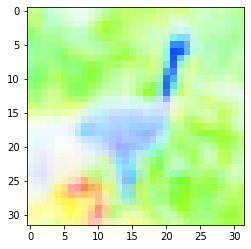

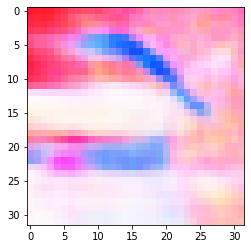

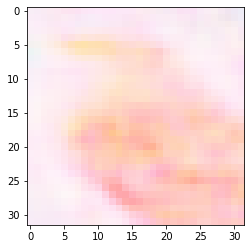

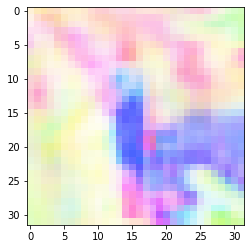

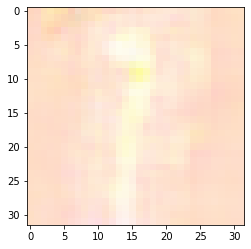

In [0]:
x=[]
#getting images ( the original , for later) to display
for i in range(1000):
  if(y_train[i]==[2]):
    x.append(x_train[i])
# displaying decoded images
for i in  range(5):
  plt.figure()
  plt.imshow(preds[i])

Here we display the original images for comparison

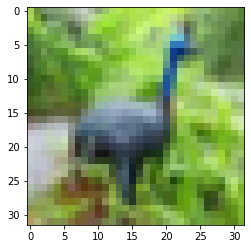

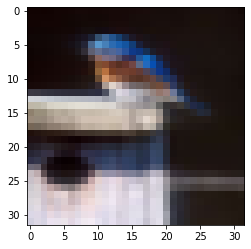

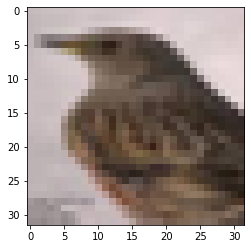

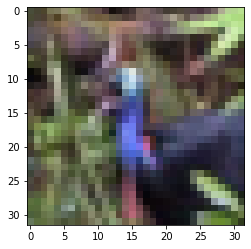

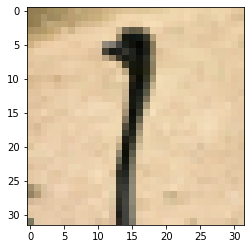

In [0]:
#displaying original images
for i in  range(5):
  plt.figure()
  plt.imshow(x[i])

Credits:
*   https://blog.keras.io/building-autoencoders-in-keras.html for understanding what an autoencoder is and get an idea of how to implement one [1]